In [ ]:
# 新版本：
# 1.Prophet调参（网格搜索）  
# 2.通过置信区间确定异常阈值

In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
#配置matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

test_days = 1
%cd /content/drive/MyDrive/Colab Notebooks/tiansu/mianyang_nenghaoyichang_colab
# df = pd.read_excel("./data/mianyang_1_May.xlsx",header=0)
# df = pd.read_excel("./data/mianyang_mianyang_0501_0606.xlsx",header=0)
# df = pd.read_excel("./data/miangyang_1zhu_B1F.xlsx",header=0)
df = pd.read_excel("./data/miangyang_aircon_June.xlsx",header=0)
# df = df[0:len(df)-test_days]#取前面为训练数据，后test_days个为测试数据
#按照prophet格式更改数据名称
df = df.rename(columns={"power_consumption":"y", "timestamp":"ds"})

df['date'] = [pd.to_datetime(d).date() for d in df['ds']]
df['time'] = [pd.to_datetime(d).time() for d in df['ds']]
df.replace('--',0,inplace=True)
# df_test = df[(df.ds>='2022-05-29 12:00')]
s_clock = 15
df_init = df[(df.ds<'2022-06-15 15:00')]
df_2_weeks = df_init[-2*7*24:]
grouped = df_2_weeks.groupby("time")
y_median = grouped['y'].agg('median')
df_1_weeks = df_init[-1*7*24:]
def is_abnormal(y,x):
  return abs(y-x)/max(x,y)>0.3
for i in range(1*7*24):

  if  is_abnormal(float(df_2_weeks.iloc[i]['y']),y_median[(s_clock+i)%24]):

    print('{0}的用电量{1}需要更新为中位值：{2}'.format(df_2_weeks.iloc[i]['ds'],df_2_weeks.iloc[i]['y'],y_median[(s_clock+i)%24]))
    df_1_weeks.iat[i,2] = y_median[(s_clock+i)%24]


/content/drive/MyDrive/Colab Notebooks/tiansu/mianyang_nenghaoyichang_colab
2022-06-01 21:00的用电量446.97需要更新为中位值：963.12
2022-06-01 22:00的用电量413.09需要更新为中位值：908.825
2022-06-03 07:00的用电量559.29需要更新为中位值：908.215
2022-06-04 07:00的用电量292.41需要更新为中位值：908.215
2022-06-04 08:00的用电量562.27需要更新为中位值：1141.845
2022-06-04 10:00的用电量940.72需要更新为中位值：1408.81
2022-06-04 11:00的用电量955.74需要更新为中位值：1415.19
2022-06-04 12:00的用电量964.15需要更新为中位值：1404.775
2022-06-04 15:00的用电量956.47需要更新为中位值：1394.88
2022-06-04 16:00的用电量918.29需要更新为中位值：1406.0349999999999
2022-06-04 17:00的用电量893.12需要更新为中位值：1402.505
2022-06-04 20:00的用电量375.07需要更新为中位值：1002.86
2022-06-04 21:00的用电量63.7需要更新为中位值：963.12
2022-06-04 22:00的用电量53.12需要更新为中位值：908.825
2022-06-04 23:00的用电量45.34需要更新为中位值：518.27
2022-06-05 00:00的用电量1355.89需要更新为中位值：379.78
2022-06-05 07:00的用电量239.52需要更新为中位值：908.215
2022-06-05 08:00的用电量609.96需要更新为中位值：1141.845
2022-06-05 21:00的用电量428.87需要更新为中位值：963.12
2022-06-05 22:00的用电量418.0需要更新为中位值：908.825
2022-06-05 23:00的用电量916.25需要更新为中位值：518.27
2022-06-06 00:00

In [6]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 
# df.to_csv('df.csv')

#prophet拟合

df_training = df_1_weeks.copy()
list_real = []
list_predict = []
list_yhat_lower = []
list_yhat_upper = []
list_error = []
list_timestamp = []
# from sklearn.model_selection import ParameterGrid
# params_grid = {'seasonality_mode':('multiplicative','additive'),
#                'changepoint_prior_scale':[0.1,0.13],
#               # 'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
#               'n_changepoints' : [55],
#               'changepoint_range':[0.9,0.98]}
# grid = ParameterGrid(params_grid)
# cnt = 0
# for p in grid:
#     cnt = cnt+1

# print('Total Possible Models',cnt)

In [7]:



# model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
# for p in grid:
df_test = df[(df.ds>='2022-06-15 15:00')]

df_training = df_1_weeks.copy()
test = pd.DataFrame()
# print(p)
# random.seed(0)
for i in range(5):
  

# # for i in range(24):
#   model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                         # holidays_prior_scale = p['holidays_prior_scale'],
#                         n_changepoints = p['n_changepoints'],
#                         # seasonality_mode = p['seasonality_mode'],
#                         weekly_seasonality=True,
#                         # daily_seasonality = True,
#                         # yearly_seasonality = True,
#                         # holidays=holiday, 
#                         interval_width=0.95)
  model = Prophet(weekly_seasonality=True)

  # model = Prophet(weekly_seasonality=True)
  # model = Prophet(mcmc_samples=100)
  # model.add_country_holidays('CN')
  model.fit(df_training)
  # print(model.predictive_samples(future))
  #预测的数据
  future = model.make_future_dataframe(periods = test_days, freq = "1h")
  forecast = model.predict(future)
  # print(forecast)
  # forecast.tail()#显示预测结果
  # model.plot(forecast)
  # model.plot_components(forecast)

  #计算error
  def mean_absolute_percentage_error(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / max(y_true,y_pred))) * 100
  timestamp = df_test.iloc[0].ds
  real_value = float(df_test.iloc[0].y)
  predict_value = forecast.yhat[-test_days:].values[0]
  yhat_upper = forecast.yhat_upper[-test_days:].values[0]
  yhat_lower = forecast.yhat_lower[-test_days:].values[0]
  error = mean_absolute_percentage_error(real_value, predict_value)
  # forecast[yhat_upper]
  list_timestamp.append(timestamp)
  list_real.append(real_value)
  list_predict.append(predict_value)
  list_yhat_lower.append(yhat_lower)
  list_yhat_upper.append(yhat_upper)
  list_error.append(error)

  df_training = pd.concat([df_training.iloc[1:],df_test.iloc[:1]], axis=0)
  error = '{:.2f}'.format(error)
  predict_value_str = '{:.2f}'.format(predict_value)
  yhat_lower_str = '{:.2f}'.format(yhat_lower)
  yhat_upper_str = '{:.2f}'.format(yhat_upper)
  
  
  
  if yhat_lower <= real_value <= yhat_upper:
    print('{0}的用电量真实值{1}与模型预测值{2}的偏差为{3}%,在预测值低限{4}和高限{5}之间，能耗正常。'.format(df_test.iloc[0].ds,df_test.iloc[0].y,predict_value_str,error,yhat_lower_str,yhat_upper_str))

  elif real_value <= yhat_lower:
    
    print('Warning！能耗低异常：{0}的用电量真实值{1}与模型预测值{2}的偏差为{3}%，低于预测值低限{4}。'.format(df_test.iloc[0].ds,df_test.iloc[0].y,predict_value_str,error,yhat_lower_str))
    if real_value <= 0.5 * yhat_lower:
      print(df_training.iat[-1,1])

      df_training.iat[-1,1] = predict_value
      print(df_training.iat[-1,1])
      print(predict_value)
  else:
    
    print('Warning！能耗高异常：{0}的用电量真实值{1}与模型预测值{2}的偏差为{3}%,高于预测值高限{4}。'.format(df_test.iloc[0].ds,df_test.iloc[0].y,predict_value_str,error,yhat_upper_str))
    if real_value >= 2 * yhat_upper:

      print(df_training.iat[-1,1])

      df_training.iat[-1,1] = predict_value
      print(df_training.iat[-1,1])
      print(predict_value)
  
  df_test = df_test.iloc[1:]

dataf = pd.DataFrame({'timestamp':list_timestamp,'real_value':list_real,
                      'predict_value':list_predict,'yhat_lower':list_yhat_lower,'yhat_upper':list_yhat_upper,
                      'error':list_error})


# dataf.to_csv('dataf_add_weekly_mianyang_1zhu_B1F_'+str(p)+'.csv')
dataf.to_csv('dataf_add_weekly_mianyang_aircon.csv')
MAPE = dataf.error.mean()
print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
  # model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)





2022-06-15 15:00的用电量真实值1714.63与模型预测值1634.48的偏差为4.67%,在预测值低限1474.30和高限1774.23之间，能耗正常。
2022-06-15 16:00的用电量真实值1687.21与模型预测值1608.75的偏差为4.65%,在预测值低限1459.09和高限1753.80之间，能耗正常。
2022-06-15 17:00的用电量真实值1498.65与模型预测值1534.06的偏差为2.31%,在预测值低限1364.48和高限1681.48之间，能耗正常。
2022-06-15 18:00的用电量真实值1444.1与模型预测值1442.28的偏差为0.13%,在预测值低限1292.00和高限1586.24之间，能耗正常。
2022-06-15 19:00的用电量真实值1331.94与模型预测值1337.61的偏差为0.42%,在预测值低限1182.38和高限1488.62之间，能耗正常。
Mean Absolute Percentage Error(MAPE)------------------------------------ 2.4366662284865166


In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(30)

,MAPE,Parameters
0,15.144749,"{'changepoint_prior_scale': 0.14, 'changepoint_range': 0.97, 'n_changepoints': 55}"
1,15.144749,"{'changepoint_prior_scale': 0.14, 'changepoint_range': 0.99, 'n_changepoints': 55}"
2,15.150975,"{'changepoint_prior_scale': 0.16, 'changepoint_range': 0.97, 'n_changepoints': 55}"
3,15.154088,"{'changepoint_prior_scale': 0.16, 'changepoint_range': 0.99, 'n_changepoints': 55}"


In [ ]:
parameters['Parameters'][0:10]

0     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'n_changepoints': 30}
1     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'n_changepoints': 25}
2     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'n_changepoints': 20}
3     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'n_changepoints': 30}
4     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'n_changepoints': 25}
5     {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'n_changepoints': 20}
6    {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.9, 'n_changepoints': 30}
7    {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.8, 'n_changepoints': 30}
8    {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.9, 'n_changepoints': 25}
9    {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.8, 'n_changepoints': 25}
Name: Parameters, dtype: object

In [ ]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows',1000)

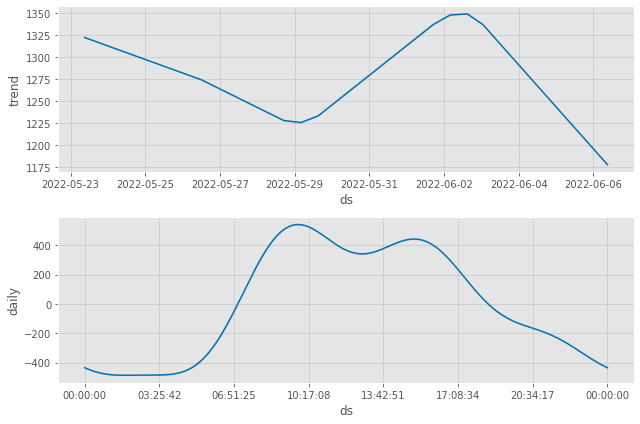

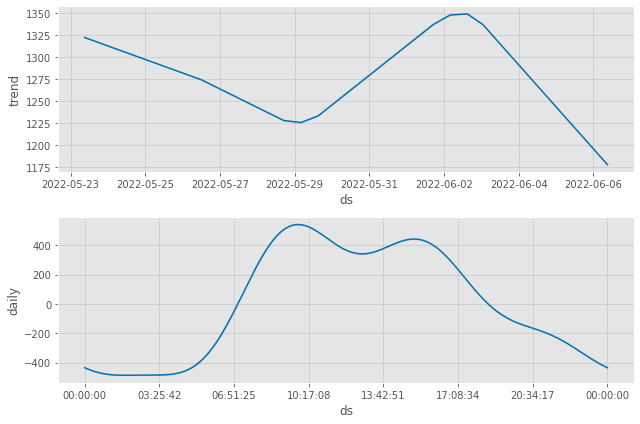

In [ ]:
model.plot_components(forecast)

In [ ]:
# 之前版本：
# 1.Prophet默认参数 
# 2.偏差百分比（30%）作为异常阈值

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
#配置matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

test_days = 1
%cd /content/drive/MyDrive/Colab Notebooks/tiansu/mianyang
# df = pd.read_excel("./data/mianyang_1_May.xlsx",header=0)
# df = pd.read_excel("./data/mianyang_mianyang_0501_0606.xlsx",header=0)
# df = pd.read_excel("./data/mianyang_1zhu_B1F.xlsx",header=0)
df = pd.read_excel("./data/mianyang_aircon_6.xlsx",header=0)
# df = df[0:len(df)-test_days]#取前面为训练数据，后test_days个为测试数据
#按照prophet格式更改数据名称
df = df.rename(columns={"power_consumption":"y", "timestamp":"ds"})

df['date'] = [pd.to_datetime(d).date() for d in df['ds']]
df['time'] = [pd.to_datetime(d).time() for d in df['ds']]
df.replace('--',0,inplace=True)
df_test = df[(df.ds>='2022-06-11 15:00')]
s_clock = 15
df_init = df[(df.ds<'2022-06-11 15:00')]
df_4_weeks = df_init[-240:]
grouped = df_4_weeks.groupby("time")
y_median = grouped['y'].agg('median')
df_2_weeks = df_init[-120:]
def is_abnormal(y,x):
  return abs(y-x)/max(x,y)>0.3
for i in range(120):

  if  is_abnormal(float(df_2_weeks.iloc[i]['y']),y_median[(s_clock+i)%24]):

    print('{0}的用电量{1}需要更新为中位值：{2}'.format(df_2_weeks.iloc[i]['ds'],df_2_weeks.iloc[i]['y'],y_median[(s_clock+i)%24]))
    df_2_weeks.iat[i,2] = y_median[(s_clock+i)%24]

/content/drive/MyDrive/Colab Notebooks/tiansu/mianyang
2022-06-06 23:00的用电量857.87需要更新为中位值：518.27
2022-06-07 00:00的用电量847.85需要更新为中位值：379.78
2022-06-07 23:00的用电量918.41需要更新为中位值：518.27
2022-06-08 00:00的用电量859.11需要更新为中位值：379.78
2022-06-08 01:00的用电量819.21需要更新为中位值：334.565
2022-06-08 02:00的用电量761.38需要更新为中位值：241.97
2022-06-08 03:00的用电量550.13需要更新为中位值：239.26
2022-06-08 07:00的用电量1035.71需要更新为中位值：709.41
2022-06-09 07:00的用电量1088.7需要更新为中位值：709.41
2022-06-09 21:00的用电量635.42需要更新为中位值：910.64
2022-06-09 22:00的用电量420.95需要更新为中位值：895.89


In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 
# df.to_csv('df.csv')

#prophet拟合

df_training = df_2_weeks.copy()
list_real = []
list_predict = []
list_error = []
list_timestamp = []

for i in range(10):
  
# for i in range(24):

  # model = Prophet(weekly_seasonality=True,interval_width=0.95)
  model = Prophet()
  model.fit(df_training)
  #预测的数据
  future = model.make_future_dataframe(periods = test_days, freq = "1h")
  forecast = model.predict(future)
  forecast.tail()#显示预测结果
  model.plot(forecast)
  model.plot_components(forecast)

  #计算error
  def mean_absolute_percentage_error(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / max(y_true,y_pred))) * 100
  timestamp = df_test.iloc[0].ds
  real_value = float(df_test.iloc[0].y)
  predict_value = forecast.yhat[-test_days:].values[0]
  error = mean_absolute_percentage_error(real_value, predict_value)
  
  list_timestamp.append(timestamp)
  list_real.append(real_value)
  list_predict.append(predict_value)
  list_error.append(error)

  df_training = pd.concat([df_training.iloc[1:],df_test.iloc[:1]], axis=0)
  
  
  

  if error > 30:
    error = '{:.2f}'.format(error)
    predict_value_str = '{:.2f}'.format(predict_value)
    print('Warning！能耗异常：{0}的用电量真实值{1}与模型预测值{2}的偏差为{3}%，使用预测值作为训练数据'.format(df_test.iloc[0].ds,df_test.iloc[0].y,predict_value_str,error))
    df_training.iat[-1,2] = predict_value
  else:
    error = '{:.2f}'.format(error)
    predict_value_str = '{:.2f}'.format(predict_value)
    print('{0}的用电量真实值{1}与模型预测值{2}的偏差为{3}%,能耗正常。'.format(df_test.iloc[0].ds,df_test.iloc[0].y,predict_value_str,error))
  df_test = df_test.iloc[1:]

dataf = pd.DataFrame({'timestamp':list_timestamp,'real_value':list_real,'predict_value':list_predict,'error':list_error})
dataf.to_csv('dataf_add_weekly_0613.csv')



